In [6]:
import pandas as pd 
import matplotlib.pyplot as plt
import csv
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import mplstereonet

test test

In [2]:
couleurs_str = {
    '-1': 'gray',
    '0': 'red',  # Rouge
    '1': 'blue',  # Bleu
    '2': 'green',  # Vert
    '3': 'orange',  # Orange
    '4': 'purple',  # Violet
    '5': 'cyan',  # Cyan
    '6': 'magenta',  # Magenta
    '7': 'yellow',  # Jaune
    '8': 'black',  # Noir
}

couleurs = {
    -1: 'gray',
    0: 'red',  # Rouge
    1: 'blue',  # Bleu
    2: 'green',  # Vert
    3: 'orange',  # Orange
    4: 'purple',  # Violet
    5: 'cyan',  # Cyan
    6: 'magenta',  # Magenta
    7: 'yellow',  # Jaune
    8: 'black',  # Noir
}

In [3]:
# Ouvrir le fichier CSV en mode lecture
with open('Plans.csv', newline='') as fichier_csv:
    lecteur_csv = csv.reader(fichier_csv, delimiter=';')
    # Ignorer l'en-tête s'il existe
    next(lecteur_csv)
    # Parcourir les lignes et afficher la valeur de la n-ieme colonne (par exemple, la 3e colonne)
    azimut = []
    pendage = []
    for ligne in lecteur_csv:
        dip_orientation = float(ligne[10])
        dip = float(ligne[9])
        if dip_orientation <= 90:
            orientation = 270 + dip_orientation
        else:
            orientation = dip_orientation - 90
        azimut.append(orientation)
        pendage.append(dip)

print(azimut)
print(pendage)
data = {
    'azimut': azimut,
    'pendage': pendage
}
df = pd.DataFrame(data)
print(df)
moyenne_azimut = df['azimut'].mean()
print(f"Moyenne des azimuts : {moyenne_azimut}")

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[['azimut', 'pendage']])

[142.21, 290.21, 332.4154, 300.6684, 321.6684, 200.0, 260.0, 271.0, 30.0]
[89.5892, 50.0, 60.1215, 54.3702, 76.3702, 40.3702, 45.0, 45.0, 25.0]
     azimut  pendage
0  142.2100  89.5892
1  290.2100  50.0000
2  332.4154  60.1215
3  300.6684  54.3702
4  321.6684  76.3702
5  200.0000  40.3702
6  260.0000  45.0000
7  271.0000  45.0000
8   30.0000  25.0000
Moyenne des azimuts : 238.6858


In [4]:

# DBSCAN clustering
db = DBSCAN(eps=0.2, min_samples=2)
# Eps (epsilon) : Distance maximale entre deux points pour qu'ils soient considérés comme dans le même voisinage.
# Min_samples : Nombre minimal de points requis pour former un cluster.
labels = db.fit_predict(data_scaled)

# Ajout des labels de cluster au DataFrame
df['famille'] = labels

print(df)

df_azimuts_par_famille = df.groupby('famille')['azimut'].apply(list).reset_index()
print(df_azimuts_par_famille)

familles_uniques = df['famille'].unique()


     azimut  pendage  famille
0  142.2100  89.5892       -1
1  290.2100  50.0000       -1
2  332.4154  60.1215       -1
3  300.6684  54.3702       -1
4  321.6684  76.3702       -1
5  200.0000  40.3702       -1
6  260.0000  45.0000        0
7  271.0000  45.0000        0
8   30.0000  25.0000       -1
   famille                                             azimut
0       -1  [142.21, 290.21, 332.4154, 300.6684, 321.6684,...
1        0                                     [260.0, 271.0]


[142.21, 290.21, 332.4154, 300.6684, 321.6684, 200.0, 30.0]
[260.0, 271.0]


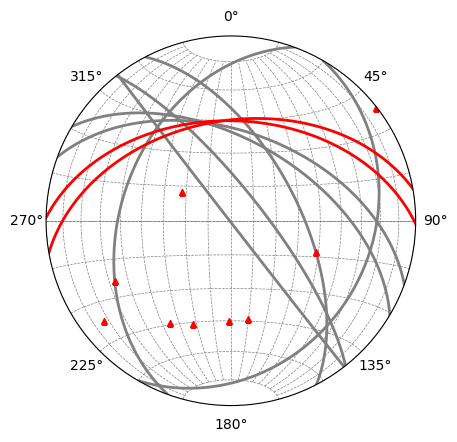

In [11]:
# Boucle pour afficher les azimuts selon chaque famille

fig = plt.figure()
ax = fig.add_subplot(111, projection='stereonet')

for famille in familles_uniques:
    azimuts = df[df['famille'] == famille]['azimut'].tolist()
    print(df[df['famille'] == famille]['azimut'].tolist())
    strikes = df[df['famille'] == famille]['azimut'].tolist()
    dips = df[df['famille'] == famille]['pendage'].tolist()
    ax.plane(strikes, dips, color=f"{couleurs[famille]}", linewidth=2)
    ax.pole(strikes, dips, '^', color='red', markersize=4)
ax.set_longitude_grid(10)
ax.set_longitude_grid_ends(75)
ax.grid(which='both', linestyle='dashed', color='gray',
        linewidth=0.5)  # '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'

#fig.tight_layout()
plt.show()

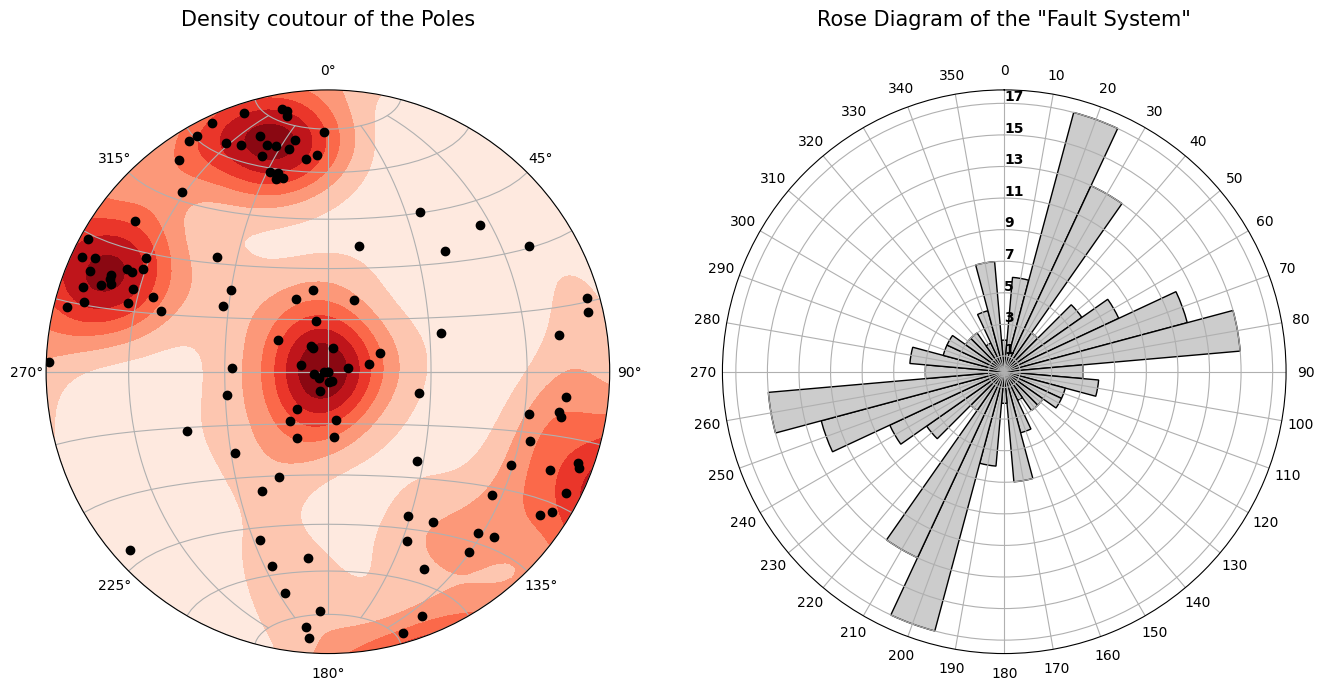

In [29]:
import numpy as np
import mplstereonet
import matplotlib.pyplot as plt

%matplotlib inline

strikes = np.concatenate([np.random.randint(0, 360, 60),
                          np.random.randint(10, 60, 20),
                          np.random.randint(190, 300, 20),
                          np.random.randint(60, 90, 20),
                         ])

dips = np.concatenate([np.random.randint(0, 90, 60),
                       np.random.randint(60, 90, 60),
                         ])

bin_edges = np.arange(-5, 366, 10)
number_of_strikes, bin_edges = np.histogram(strikes, bin_edges)
number_of_strikes[0] += number_of_strikes[-1]
half = np.sum(np.split(number_of_strikes[:-1], 2), 0)
two_halves = np.concatenate([half, half])

fig = plt.figure(figsize=(16,8))

ax = fig.add_subplot(121, projection='stereonet')

ax.pole(strikes, dips, c='k', label='Pole of the Planes')
ax.density_contourf(strikes, dips, measurement='poles', cmap='Reds')
ax.set_title('Density coutour of the Poles', y=1.10, fontsize=15)
ax.grid()

ax = fig.add_subplot(122, projection='polar')

ax.bar(np.deg2rad(np.arange(0, 360, 10)), two_halves, 
       width=np.deg2rad(10), bottom=0.0, color='.8', edgecolor='k')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_thetagrids(np.arange(0, 360, 10), labels=np.arange(0, 360, 10))
ax.set_rgrids(np.arange(1, two_halves.max() + 1, 2), angle=0, weight= 'black')
ax.set_title('Rose Diagram of the "Fault System"', y=1.10, fontsize=15)

plt.show()

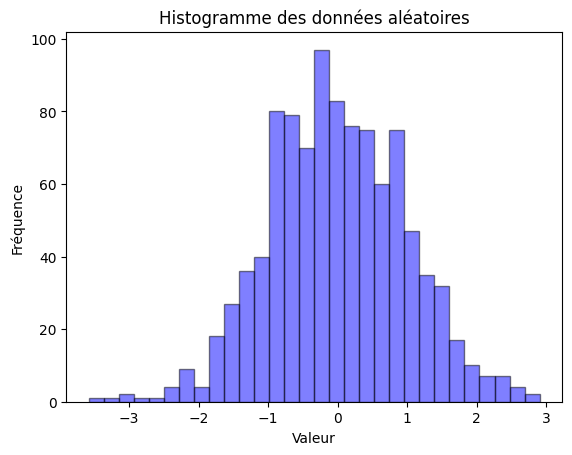

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Générer des données aléatoires
data = np.random.randn(1000)

# Créer l'histogramme
plt.hist(data, bins=30, alpha=0.5, color='blue', edgecolor='black')

# Ajouter des titres et des étiquettes
plt.title('Histogramme des données aléatoires')
plt.xlabel('Valeur')
plt.ylabel('Fréquence')

# Afficher l'histogramme
plt.show()

In [ ]:
import csv

def csv_to_ascii(csv_file_path, ascii_file_path):
    with open(csv_file_path, 'r', newline='', encoding='utf-8') as csv_file:
        csv_reader = csv.reader(csv_file)
        with open(ascii_file_path, 'w', encoding='ascii', errors='ignore') as ascii_file:
            for row in csv_reader:
                ascii_row = [col.encode('ascii', 'ignore').decode('ascii') for col in row]
                ascii_file.write('\t'.join(ascii_row) + '\n')

# Example usage
csv_to_ascii('Plans.csv', 'output.txt')

In [ ]:
import csv

def calculate_vertices(x, y, z, width, length):
    half_width = width / 2
    half_length = length / 2
    vertices = [
        (x - half_width, y - half_length, z),
        (x + half_width, y - half_length, z),
        (x + half_width, y + half_length, z),
        (x - half_width, y + half_length, z)
    ]
    vertices = [f"{vertex[0]},{vertex[1]},{vertex[2]}" for vertex in vertices]
    return vertices

def csv_to_ascii_with_vertices(csv_file_path, ascii_file_path):
    with open(csv_file_path, 'r', newline='', encoding='utf-8') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=';')
        with open(ascii_file_path, 'w', encoding='ascii', errors='ignore') as ascii_file:
            next(csv_reader)  # Skip header
            for row in csv_reader:
                x = float(row[3])
                y = float(row[4])
                z = float(row[5])
                name = row[0]
                width = float(row[1])
                length = float(row[2])
                vertices = calculate_vertices(x, y, z, width, length)
                for vertex in vertices:
                    ascii_file.write(f"{vertex};{name}\n")

# Example usage
csv_to_ascii_with_vertices('Plans.csv', 'vertices_output.txt')